In [1]:
from tensorflow import keras
import data_reader

2023-10-16 13:43:46.629272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
EPOCHS = 20

In [3]:
dr = data_reader.DataReader()



Data Read Done!
Training X Size : (134384, 7)
Training Y Size : (134384,)
Test X Size : (33596, 7)
Test Y Size : (33596,)




In [6]:
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',metrics=['mae'],
              loss='mse')

In [12]:
print("START TRAINING")

START TRAINING


In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y,epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y), callbacks=[early_stop])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4188/4200 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0302WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f916d4e69e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and a

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 256)               2048      
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 199,737
Trainable params: 199,737
Non-tr

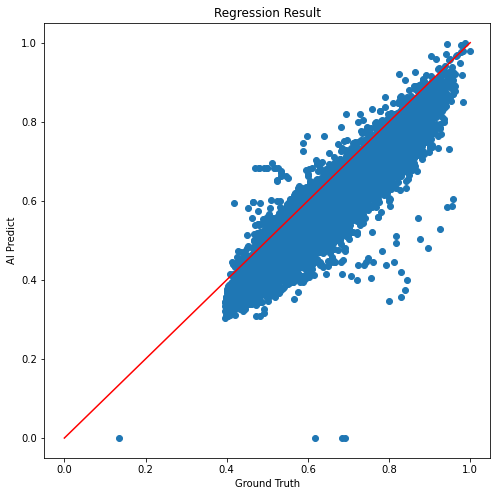

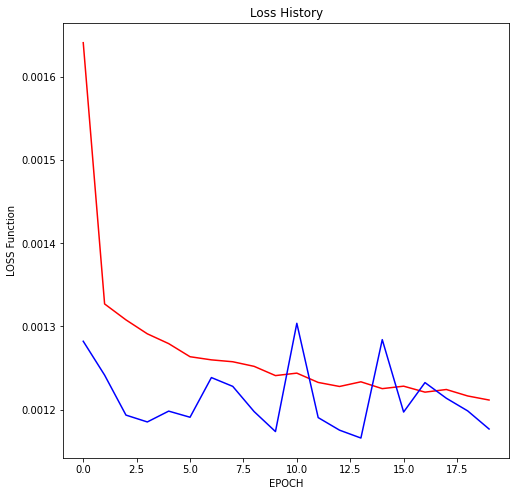

In [15]:
data_reader.draw_graph(model(dr.test_X), dr.test_Y, history)